# 回線切れの数

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import sklearn
from Functions import prepro
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [2]:
train_df = pd.read_csv("../../data/Processed/train2.csv", index_col='id')
test_df = pd.read_csv("../../data/Processed/test2.csv", index_col="id")
print(train_df.shape)
print(test_df.shape)

(132250, 79)
(28340, 78)


In [3]:
train_df.head()

,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,A3-weapon,A3-rank,A3-level,A4-weapon,A4-rank,A4-level,B1-weapon,B1-rank,B1-level,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,y,category1-A1,category2-A1,subweapon-A1,special-A1,mainweapon-A1,reskin-A1,category1-A2,category2-A2,subweapon-A2,special-A2,mainweapon-A2,reskin-A2,category1-A3,category2-A3,subweapon-A3,special-A3,mainweapon-A3,reskin-A3,category1-A4,category2-A4,subweapon-A4,special-A4,mainweapon-A4,reskin-A4,category1-B1,category2-B1,subweapon-B1,special-B1,mainweapon-B1,reskin-B1,category1-B2,category2-B2,subweapon-B2,special-B2,mainweapon-B2,reskin-B2,category1-B3,category2-B3,subweapon-B3,special-B3,mainweapon-B3,reskin-B3,category1-B4,category2-B4,subweapon-B4,special-B4,mainweapon-B4,reskin-B4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-10-15T20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,sshooter_becchu,NaN,139,soytuber_custom,NaN,118.0,pablo_hue,NaN,13.0,hokusai,NaN,10.0,bold_7,NaN,28,hokusai_becchu,NaN,26.0,herocharger_replica,NaN,68.0,sharp_neo,NaN,31.0,1,shooter,shooter,kyubanbomb,missile,sshooter,sshooter_becchu,charger,charger,curlingbomb,jetpack,soytuber,soytuber_custom,roller,brush,trap,sphere,pablo,pablo_hue,roller,brush,robotbomb,jetpack,hokusai,hokusai,shooter,shooter,splashbomb,ultrahanko,bold,bold_7,roller,brush,kyubanbomb,ultrahanko,hokusai,hokusai_becchu,charger,charger,splashbomb,presser,splatcharger,splatcharger,shooter,shooter,quickbomb,kyubanbomb_pitcher,sharp,sharp_neo
1,2019-10-15T20:00:00+00:00,5.0.1,regular,standard,nawabari,sumeshi,bold_7,NaN,28,hokusai_becchu,NaN,26.0,herocharger_replica,NaN,68.0,sharp_neo,NaN,31.0,sshooter_becchu,NaN,139,soytuber_custom,NaN,118.0,pablo_hue,NaN,13.0,hokusai,NaN,10.0,0,shooter,shooter,splashbomb,ultrahanko,bold,bold_7,roller,brush,kyubanbomb,ultrahanko,hokusai,hokusai_becchu,charger,charger,splashbomb,presser,splatcharger,splatcharger,shooter,shooter,quickbomb,kyubanbomb_pitcher,sharp,sharp_neo,shooter,shooter,kyubanbomb,missile,sshooter,sshooter_becchu,charger,charger,curlingbomb,jetpack,soytuber,soytuber_custom,roller,brush,trap,sphere,pablo,pablo_hue,roller,brush,robotbomb,jetpack,hokusai,hokusai
2,2019-12-14T04:00:00+00:00,5.0.1,regular,standard,nawabari,arowana,momiji,NaN,83,squiclean_b,NaN,118.0,campingshelter,NaN,168.0,sputtery_clear,NaN,151.0,parashelter_sorella,NaN,198,jetsweeper,NaN,77.0,campingshelter_camo,NaN,198.0,nzap85,NaN,123.0,1,shooter,shooter,robotbomb,amefurashi,wakaba,momiji,charger,charger,robotbomb,sphere,squiclean_a,squiclean_b,brella,brella,jumpbeacon,bubble,campingshelter,campingshelter,shooter,maneuver,torpedo,chakuchi,sputtery,sputtery_clear,brella,brella,robotbomb,splashbomb_pitcher,parashelter,parashelter_sorella,shooter,shooter,poisonmist,missile,jetsweeper,jetsweeper,brella,brella,trap,ultrahanko,campingshelter,campingshelter_camo,shooter,shooter,kyubanbomb,armor,nzap85,nzap85
2,2019-12-14T04:00:00+00:00,5.0.1,regular,standard,nawabari,arowana,parashelter_sorella,NaN,198,jetsweeper,NaN,77.0,campingshelter_camo,NaN,198.0,nzap85,NaN,123.0,momiji,NaN,83,squiclean_b,NaN,118.0,campingshelter,NaN,168.0,sputtery_clear,NaN,151.0,0,brella,brella,robotbomb,splashbomb_pitcher,parashelter,parashelter_sorella,shooter,shooter,poisonmist,missile,jetsweeper,jetsweeper,brella,brella,trap,ultrahanko,campingshelter,campingshelter_camo,shooter,shooter,kyubanbomb,armor,nzap85,nzap85,shooter,shooter,robotbomb,amefurashi,wakaba,momiji,charger,charger,robotbomb,sphere,squiclean_a,squiclean_b,brella,brella,jumpbeacon,bubble,campingshelter,campingshelter,shooter,maneuver,torpedo,chakuchi,sputtery,sputtery_clear
3,2019-12-25T14:00:00+00:00,5.0.1,gachi,standard,hoko,ama,bold_7,a-,50,nzap85,a+,163.0,prime_becchu,a-,160.0,dualsweeper_custom,a,126.0,nzap89,a-,114,quadhopper_black,a,68.0,prime_becchu,a,225.0,jetsweeper,a,107.0,1,shooter,shooter,splashbomb,ultrahanko,b

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132250 entries, 1 to 66125
Data columns (total 79 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   period         132250 non-null  object 
 1   game-ver       132250 non-null  object 
 2   lobby-mode     132250 non-null  object 
 3   lobby          132250 non-null  object 
 4   mode           132250 non-null  object 
 5   stage          132250 non-null  object 
 6   A1-weapon      132250 non-null  object 
 7   A1-rank        103362 non-null  object 
 8   A1-level       132250 non-null  int64  
 9   A2-weapon      132250 non-null  object 
 10  A2-rank        103362 non-null  object 
 11  A2-level       132250 non-null  float64
 12  A3-weapon      132249 non-null  object 
 13  A3-rank        103362 non-null  object 
 14  A3-level       132249 non-null  float64
 15  A4-weapon      132132 non-null  object 
 16  A4-rank        103262 non-null  object 
 17  A4-level       132132 non-null

In [5]:
test_df.head()

,period,game-ver,lobby-mode,lobby,mode,stage,A1-weapon,A1-rank,A1-level,A2-weapon,A2-rank,A2-level,A3-weapon,A3-rank,A3-level,A4-weapon,A4-rank,A4-level,B1-weapon,B1-rank,B1-level,B2-weapon,B2-rank,B2-level,B3-weapon,B3-rank,B3-level,B4-weapon,B4-rank,B4-level,category1-A1,category2-A1,subweapon-A1,special-A1,mainweapon-A1,reskin-A1,category1-A2,category2-A2,subweapon-A2,special-A2,mainweapon-A2,reskin-A2,category1-A3,category2-A3,subweapon-A3,special-A3,mainweapon-A3,reskin-A3,category1-A4,category2-A4,subweapon-A4,special-A4,mainweapon-A4,reskin-A4,category1-B1,category2-B1,subweapon-B1,special-B1,mainweapon-B1,reskin-B1,category1-B2,category2-B2,subweapon-B2,special-B2,mainweapon-B2,reskin-B2,category1-B3,category2-B3,subweapon-B3,special-B3,mainweapon-B3,reskin-B3,category1-B4,category2-B4,subweapon-B4,special-B4,mainweapon-B4,reskin-B4
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2019-12-17T12:00:00+00:00,5.0.1,gachi,standard,area,hakofugu,prime_collabo,x,174,herospinner_replica,x,130.0,nzap89,x,127.0,nova_becchu,x,233.0,furo,x,160,nautilus47,x,151.0,l3reelgun_d,x,213.0,nzap89,x,306.0,shooter,shooter,kyubanbomb,bubble,prime,prime_collabo,splatling,splatling,sprinkler,presser,barrelspinner,barrelspinner,shooter,shooter,robotbomb,missile,nzap85,nzap89,shooter,blaster,tansanbomb,amefurashi,nova,nova_becchu,slosher,slosher,splashshield,amefurashi,furo,furo,splatling,splatling,pointsensor,sphere,nautilus47,nautilus47,shooter,reelgun,quickbomb,jetpack,l3reelgun,l3reelgun_d,shooter,shooter,robotbomb,missile,nzap85,nzap89
2,2019-11-25T16:00:00+00:00,5.0.1,gachi,standard,asari,anchovy,prime_becchu,s+,363,nzap89,s+,59.0,dynamo_becchu,s+,36.0,rapid_becchu,s+,225.0,furo,s+,326,dualsweeper_custom,s+,289.0,prime_becchu,s+,147.0,splatroller,s+,156.0,shooter,shooter,splashbomb,nicedama,prime,prime_becchu,shooter,shooter,robotbomb,missile,nzap85,nzap89,roller,roller,sprinkler,nicedama,dynamo,dynamo_becchu,shooter,blaster,torpedo,sphere,rapid,rapid_becchu,slosher,slosher,splashshield,amefurashi,furo,furo,shooter,maneuver,splashbomb,amefurashi,dualsweeper,dualsweeper_custom,shooter,shooter,splashbomb,nicedama,prime,prime_becchu,roller,roller,curlingbomb,chakuchi,splatroller,splatroller
3,2019-10-22T08:00:00+00:00,5.0.1,gachi,standard,area,mutsugoro,furo_deco,s,116,bold,s,125.0,nzap85,s,124.0,wakaba,s,181.0,splatroller,s,76,momiji,s,232.0,nzap83,s,183.0,promodeler_pg,s,105.0,slosher,slosher,sprinkler,kyubanbomb_pitcher,furo,furo_deco,shooter,shooter,curlingbomb,chakuchi,bold,bold,shooter,shooter,kyubanbomb,armor,nzap85,nzap85,shooter,shooter,splashbomb,armor,wakaba,wakaba,roller,roller,curlingbomb,chakuchi,splatroller,splatroller,shooter,shooter,robotbomb,amefurashi,wakaba,momiji,shooter,shooter,sprinkler,amefurashi,nzap85,nzap83,shooter,shooter,quickbomb,nicedama,promodeler_mg,promodeler_pg
4,2019-12-30T04:00:00+00:00,5.0.1,gachi,standard,asari,devon,prime_becchu,s+,192,splatspinner_collabo,s+,115.0,pablo,s+,171.0,dualsweeper_custom,s+,170.0,momiji,s+,90,quadhopper_black,s+,119.0,soytuber,s+,172.0,prime,s+,70.0,shooter,shooter,splashbomb,nicedama,prime,prime_becchu,splatling,splatling,curlingbomb,amefurashi,splatspinner,splatspinner_collabo,roller,brush,splashbomb,chakuchi,pablo,pablo,shooter,maneuver,splashbomb,amefurashi,dualsweeper,dualsweeper_custom,shooter,shooter,robotbomb,amefurashi,wakaba,momiji,shooter,maneuver,robotbomb,chakuchi,quadhopper_black,quadhopper_black,charger,charger,kyubanbomb,chakuchi,soytuber,soytuber,shooter,shooter,pointsensor,amefurashi,prime,prime
5,2019-10-15T16:00:00+00:00,5.0.1,gachi,standard,yagura,anchovy,l3reelgun_d,x,267,rapid_becchu,x,223.0,heroroller_replica,x,240.0,hydra_custom,x,190.0,nzap83,x,259,sshooter_becchu,x,198.0,splatscope,x,50.0,screwslosher_becchu,x,287.0,shooter,reelgun,quickbomb,jetpack,l3reelgun,l3reelgun_d,shooter,blaster,torpedo,sphere,rapid,rapid_becchu,roller,roller,curlingbomb,chakuchi,splatroller,splatroller,splatling,splatling,trap,armor,hydra,

### 武器の情報を個人ごとからチームごとに変える
category1, 2を落とす、

他のカテゴリをチームごとにする

reskinそのまま

In [6]:
suffixes = ["-A1", "-A2", "-A3", "-A4", "-B1", "-B2", "-B3", "-B4"]
drop_cols = ["category1", "category2"]

for c in drop_cols:
    for s in suffixes:
        col = c+s
        train_df.drop(col, axis=1, inplace=True)
        test_df.drop(col, axis=1, inplace=True)

In [7]:
train_df.columns

Index(['period', 'game-ver', 'lobby-mode', 'lobby', 'mode', 'stage',
       'A1-weapon', 'A1-rank', 'A1-level', 'A2-weapon', 'A2-rank', 'A2-level',
       'A3-weapon', 'A3-rank', 'A3-level', 'A4-weapon', 'A4-rank', 'A4-level',
       'B1-weapon', 'B1-rank', 'B1-level', 'B2-weapon', 'B2-rank', 'B2-level',
       'B3-weapon', 'B3-rank', 'B3-level', 'B4-weapon', 'B4-rank', 'B4-level',
       'y', 'subweapon-A1', 'special-A1', 'mainweapon-A1', 'reskin-A1',
       'subweapon-A2', 'special-A2', 'mainweapon-A2', 'reskin-A2',
       'subweapon-A3', 'special-A3', 'mainweapon-A3', 'reskin-A3',
       'subweapon-A4', 'special-A4', 'mainweapon-A4', 'reskin-A4',
       'subweapon-B1', 'special-B1', 'mainweapon-B1', 'reskin-B1',
       'subweapon-B2', 'special-B2', 'mainweapon-B2', 'reskin-B2',
       'subweapon-B3', 'special-B3', 'mainweapon-B3', 'reskin-B3',
       'subweapon-B4', 'special-B4', 'mainweapon-B4', 'reskin-B4'],
      dtype='object')

In [8]:
y = train_df["y"]
train_df = train_df.drop("y", axis=1)

In [9]:
# add team info
train_df,  test_df = prepro.addTeamInfo(train_df, test_df)

(160590, 62)
['splashbomb_pitcher', 'armor', 'nicedama', 'kyubanbomb_pitcher', 'amefurashi', 'jetpack', 'curlingbomb_pitcher', 'chakuchi', 'quickbomb_pitcher', 'bubble', 'missile', 'ultrahanko', 'presser', 'sphere', 'robotbomb_pitcher']
['pointsensor', 'tansanbomb', 'splashshield', 'sprinkler', 'quickbomb', 'curlingbomb', 'poisonmist', 'jumpbeacon', 'torpedo', 'robotbomb', 'splashbomb', 'trap', 'kyubanbomb']
special-A
special-B
subweapon-A
subweapon-B
(160590, 118)
complete


In [10]:
# add disconnection info

train_df = prepro.add_disconnection(train_df)
test_df = prepro.add_disconnection(test_df)

In [11]:
# add info about numeric column

num_col = ["level"]

train_df = prepro.flat(train_df)
test_df = prepro.flat(test_df)

train_df = prepro.add_numeric_info(train_df, num_col)
test_df = prepro.add_numeric_info(test_df, num_col)

In [12]:
# train_df

In [13]:
# make input

drop_cols = ["id", "lobby", "lobby-mode",  "period", "game-ver", "A1-weapon", "A2-weapon", "A3-weapon", "A4-weapon", \
              "B1-weapon", "B2-weapon", "B3-weapon", "B4-weapon"]
X, test_X = prepro.make_input(train_df, test_df, drop_cols, verbose=False)

In [14]:
print(train_df.shape)
print(test_df.shape)
for col in X.columns:
    print(col)

(132250, 124)
(28340, 124)
mode
stage
A1-rank
A1-level
A2-rank
A2-level
A3-rank
A3-level
A4-rank
A4-level
B1-rank
B1-level
B2-rank
B2-level
B3-rank
B3-level
B4-rank
B4-level
subweapon-A1
special-A1
mainweapon-A1
reskin-A1
subweapon-A2
special-A2
mainweapon-A2
reskin-A2
subweapon-A3
special-A3
mainweapon-A3
reskin-A3
subweapon-A4
special-A4
mainweapon-A4
reskin-A4
subweapon-B1
special-B1
mainweapon-B1
reskin-B1
subweapon-B2
special-B2
mainweapon-B2
reskin-B2
subweapon-B3
special-B3
mainweapon-B3
reskin-B3
subweapon-B4
special-B4
mainweapon-B4
reskin-B4
splashbomb_pitcher-special-A
armor-special-A
nicedama-special-A
kyubanbomb_pitcher-special-A
amefurashi-special-A
jetpack-special-A
curlingbomb_pitcher-special-A
chakuchi-special-A
quickbomb_pitcher-special-A
bubble-special-A
missile-special-A
ultrahanko-special-A
presser-special-A
sphere-special-A
robotbomb_pitcher-special-A
splashbomb_pitcher-special-B
armor-special-B
nicedama-special-B
kyubanbomb_pitcher-special-B
amefurashi-special-B


In [15]:
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from lightgbm import LGBMClassifier


random.seed(0)

/opt/anaconda3/envs/spla/lib/python3.6/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [16]:
# 全データを5つに分割
SIZE = X.shape[0]
K = 5

def make_kfolds(SIZE, K):
    # return list object, each element is indices of its fold
    FOLD_SIZE = int(SIZE/K)
    res = []
    indices = [i for i in range(SIZE)]
    for i in range(K-1):
        fold = random.sample(indices, FOLD_SIZE)
        indices = list(set(indices) - set(fold))
        res.append(fold)
    res.append(indices)
    return res

folds = make_kfolds(SIZE, K)
print(len(folds))
for i, fold in enumerate(folds):
    print("fold ", i+1, " size is ", len(fold))
    

    
if SIZE != len(set(sum(folds, []))):
    print("error is occuring in spliting")
else :
    print("successfully split")


5
fold  1  size is  26450
fold  2  size is  26450
fold  3  size is  26450
fold  4  size is  26450
fold  5  size is  26450
successfully split


In [17]:
param = {
    "num_leaves" : 20,
    "n_estimators" : 100,
    "learning_rate" : 0.1,
    "num_iterations" : 1000,
    "objective" : "binary",
    "metric" : ["binary_logloss"],
}

THRESHOLD = 0.50
models = []
cv_scores = []
temp = 0
train_pred = []

all_indices = sum(folds, [])
for i in range(K):
    valid_indices = folds[i]
    train_indices = list(set(all_indices) - set(valid_indices))
    # print("train ", len(train_indices), " , valid ", len(valid_indices))
    train_X = X.iloc[train_indices].values
    train_y = y.iloc[train_indices].values
    valid_X = X.iloc[valid_indices].values
    valid_y = y.iloc[valid_indices].values
    
    train_data = lgb.Dataset(train_X, label=train_y)
    valid_data = lgb.Dataset(valid_X, label=valid_y)
    
    model = lgb.train(param, train_data, valid_sets=valid_data, early_stopping_rounds=10, verbose_eval=20)
    pred = model.predict(valid_X)
    pred = np.where(pred < THRESHOLD, 0, 1)
    train_pred.append(pred)
    temp += np.sum(pred)
    
    score = accuracy_score(pred, valid_y)
    
    models.append(model)
    cv_scores.append(score)
    
    
print("cv score : ", np.mean(cv_scores))    
print("cv ratio : ", temp / SIZE)

/opt/anaconda3/envs/spla/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 10 rounds
[20]	valid_0's binary_logloss: 0.68841
[40]	valid_0's binary_logloss: 0.687043
[60]	valid_0's binary_logloss: 0.686445
[80]	valid_0's binary_logloss: 0.686254
Early stopping, best iteration is:
[81]	valid_0's binary_logloss: 0.686236
Training until validation scores don't improve for 10 rounds
[20]	valid_0's binary_logloss: 0.689375
[40]	valid_0's binary_logloss: 0.68805
[60]	valid_0's binary_logloss: 0.687558
[80]	valid_0's binary_logloss: 0.687414
Early stopping, best iteration is:
[76]	valid_0's binary_logloss: 0.687339
Training until validation scores don't improve for 10 rounds
[20]	valid_0's binary_logloss: 0.688422
[40]	valid_0's binary_logloss: 0.687219
[60]	valid_0's binary_logloss: 0.686721
Early stopping, best iteration is:
[60]	valid_0's binary_logloss: 0.686721
Training until validation scores don't improve for 10 rounds
[20]	valid_0's binary_logloss: 0.688723
[40]	valid_0's binary_logloss: 0.687573
[60]	valid_0'

0.5099542256363212
0.5093437040347757
0.5090787859375764
0.5104302657448386
0.5104784173301631
0.509857079736735


array([[<AxesSubplot:title={'center':'pred'}>]], dtype=object)

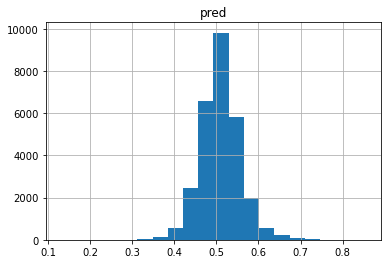

In [18]:
preds = []
for i in range(K):
    model = models[i]
    pred = model.predict(test_X)
    preds.append(pred)
    print(np.sum(pred) / pred.shape[0])
    
preds = np.array(preds)
preds = np.mean(preds, axis=0)
print(np.sum(preds) / preds.shape[0])


temp = pd.DataFrame({"pred":pred})
temp.hist(bins=20)

In [19]:
preds = np.where(preds < THRESHOLD, 0, 1)
print(np.sum(preds) / preds.shape[0])

submit_df = pd.DataFrame({'y': preds})
submit_df.index.name = 'id'
#submit_df.to_csv('../Submissions/submission8.csv')

0.5935779816513761


In [20]:
importance = pd.DataFrame(models[1].feature_importance(), index=X.columns, columns=['importance']).sort_values('importance')
display(importance)

,importance
splashbomb_pitcher-special-B,0
quickbomb_pitcher-special-A,0
B2-rank,0
splashbomb_pitcher-special-A,0
kyubanbomb_pitcher-special-A,0
quickbomb_pitcher-special-B,0
trap-subweapon-B,0
kyubanbomb_pitcher-special-B,1
robotbomb-subweapon-B,1
curlingbomb_pitcher-special-A,1
